Lucas Mation

Juan Vila

# Prediction Challenge: Part 1


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
### Load Data
data  =  pd.read_csv('nlsy training set.csv')

## Basic Demographics

We can see that overall dataset is balanced between gender, age and ethnicity. Also, if we cross tabulate this three variables we found that interally balanced.

### Table: Freq. of gender.

In [34]:
data['age']=2015-data.R0536402
data['age_t']=pd.to_numeric(data.age/10, downcast='integer')
data['gender']= np.where(data.R0536300==1,'Male','Female')
data['R1482600'] = data['R1482600'].map({1:'Black', 2: "Hispanic",3:"Mixed Race (Non-Hispanic)",4:"Non-Black / Non-Hispanic"})
data['gender'].value_counts()


Male      3666
Female    3521
Name: gender, dtype: int64

### Table: Freq. of ethnicities.

In [35]:
data['R1482600'].value_counts()


Non-Black / Non-Hispanic     3724
Black                        1873
Hispanic                     1522
Mixed Race (Non-Hispanic)      68
Name: R1482600, dtype: int64

### Table: Freq. of Ages.

In [4]:
data.age.value_counts()


34    1504
33    1467
32    1458
31    1415
35    1343
Name: age, dtype: int64

### Table: Cross-Tabulation Age and Gender

In [22]:
pd.crosstab(data.gender,data.age, normalize='index')


age,31,32,33,34,35
gender,,,,,
Female,0.197671,0.203067,0.201931,0.210452,0.186879
Male,0.196127,0.202673,0.206219,0.208129,0.186852


### Table: Cross-Tabulation Age and Ethnicity

In [36]:
pd.crosstab(data.R1482600,data.age, normalize='index')


age,31,32,33,34,35
R1482600,,,,,
Black,0.184196,0.200214,0.208222,0.203417,0.203951
Hispanic,0.199080,0.202365,0.206965,0.210250,0.181340
Mixed Race (Non-Hispanic),0.205882,0.191176,0.205882,0.176471,0.220588
Non-Black / Non-Hispanic,0.202202,0.204619,0.200859,0.212406,0.179914


### Table: Cross-Tabulation Gender and Ethnicity

In [37]:
pd.crosstab(data.R1482600,data.gender, normalize='index')


gender,Female,Male
R1482600,,
Black,0.489589,0.510411
Hispanic,0.501971,0.498029
Mixed Race (Non-Hispanic),0.500000,0.500000
Non-Black / Non-Hispanic,0.484962,0.515038


## Missings values on the variable DRINKS PER DAY LAST 30 DAYS

In [6]:
### Description variable to predict
data['Count'] = 1
data['status of respond'] = np.where(data.U1031900<0,'Missing & non response','Responded')
data['Count'].groupby(data['status of respond']).count()

status of respond
Missing & non response    3642
Responded                 3545
Name: Count, dtype: int64

We can see that from 3545 of the observation in the datasaet that we are going to predict are non-response and do not have to be asked that question.

In [7]:
data_responded=data[(data['status of respond'] == 'Responded' )]
data_responded['ln(y)'] = np.where(data_responded['U1031900'] == 0,0,np.log(data_responded['U1031900']))

## Basic Statistics and Histograms of DRINKS PER DAY LAST 30 DAYS.

In [8]:
data_responded.U1031900.describe()

count    3545.000000
mean        3.208745
std         3.909008
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        70.000000
Name: U1031900, dtype: float64

Text(0.5, 1.0, 'Histogram DRINKS PER DAY LAST 30 DAYS log level')

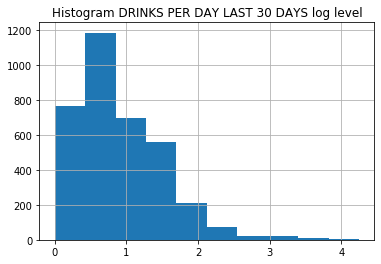

In [40]:
data_responded['ln(y)'].hist()
plt.title('Histogram DRINKS PER DAY LAST 30 DAYS log level')

We can see that distribution is concentrated in the lower values, the median is 2 drinks by month and the mean is 3.2. This is make notorious when we plot the histogram of the variables. We can see that is concentrated in the the lowel values.

If we evaluate the responded of variable of number of drinks in the month with the basic demographic variables we found:

* In case of gander, we found that male have more drinks that female. In case of ethnicity, we found that Hispanic drink on more drink that the other ethnicities, but they have a larger variance the other ones. For non-hispanic and non-black drink less that the other groups. Finally, in case of age, we found higher people of higher age drink more than the rest of the population.

* The proportion between the categories dropping the non-response and missing values keeps in similar numbers. Then, we could drop this reponses without possible bias provoked for over or under represent certain groups

### Table: Descriptive Statistics of gender and DRINKS PER DAY LAST 30 DAYS

In [23]:

data_responded.U1031900.groupby(data['gender']).describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,1717.0,2.566104,2.658468,0.0,1.0,2.0,3.0,50.0
Male,1828.0,3.812363,4.716984,1.0,2.0,3.0,4.0,70.0


### Table: Descriptive Statistics of ethnicity and DRINKS PER DAY LAST 30 DAYS

In [38]:

data_responded.U1031900.groupby(data['R1482600']).describe()

,count,mean,std,min,25%,50%,75%,max
R1482600,,,,,,,,
Black,831.0,3.016847,4.544792,0.0,2.0,2.0,3.0,70.0
Hispanic,744.0,4.044355,5.211481,0.0,2.0,3.0,4.0,65.0
Mixed Race (Non-Hispanic),39.0,2.820513,1.636295,1.0,2.0,2.0,3.5,7.0
Non-Black / Non-Hispanic,1931.0,2.977214,2.885465,0.0,2.0,2.0,4.0,60.0


### Table: Descriptive Statistics Age and DRINKS PER DAY LAST 30 DAYS

In [39]:

data_responded.U1031900.groupby(data['age']).describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
31,728.0,3.185440,3.747895,1.0,2.0,2.0,4.0,60.0
32,739.0,3.259811,3.355236,1.0,2.0,2.0,4.0,45.0
33,728.0,3.089286,2.911155,0.0,2.0,2.0,3.0,30.0
34,722.0,3.232687,4.792925,0.0,2.0,2.0,3.0,70.0
35,628.0,3.286624,4.534540,0.0,2.0,2.0,4.0,65.0


## About the other variables

In the dataset there is a total of 4,887 columns. Nevertheless, this do not imply that there are the same number of variables. One importante discussion on Machine Learning is how to build thoughtful features that help us with to increase the predictive capability of the model. Analyzing the data, we found that there is total of 777 variables. Which have different temporalities and are asked in different rounds, others are asked builded in a specific round but are constant in the whole dataset. 

This distinction between the columns and variables, open a discusion of how to use this variables. For example, we cannot put into the model all variables because we if we do not have enough observation to do that. Also, all variables have missing or non response values. Nevertheless, this is not trival how to deal with this issue. For example, how to incorporate the marrital status. We could argue that we need to incorporate the change of status instead of porcentage of time that the person have been married. In other hand, we could say that we need to incorporate only the last status. This problems can be tackle using PCA on the data and select the best ones or select the variables throughout a Lasso algorithm.  

Another element that have to be take into considerationis that 58 columns have information of 2016. This data should not be used in the training and testing data. Due to this information was not realized at the moment that the variable to predict was asked(This was in 2015).